## **Performing EDA and implementing and running Apriori Algorithm on 'ds_salaries.csv' dataset**

### **Step 1. Performing exploratory data analysis (EDA) on the provided groceries.csv data set**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read the data set
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/ds_salaries.csv"
df = pd.read_csv(path, header=None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# explore the data set
print(df.head())
print(df.info())

          0                 1                2                         3   \
0  work_year  experience_level  employment_type                 job_title   
1       2023                SE               FT  Principal Data Scientist   
2       2023                MI               CT               ML Engineer   
3       2023                MI               CT               ML Engineer   
4       2023                SE               FT            Data Scientist   

       4                5              6                   7             8   \
0  salary  salary_currency  salary_in_usd  employee_residence  remote_ratio   
1   80000              EUR          85847                  ES           100   
2   30000              USD          30000                  US           100   
3   25500              USD          25500                  US           100   
4  175000              USD         175000                  CA           100   

                 9             10  
0  company_location  compa

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/ds_salaries.csv')
print(df.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


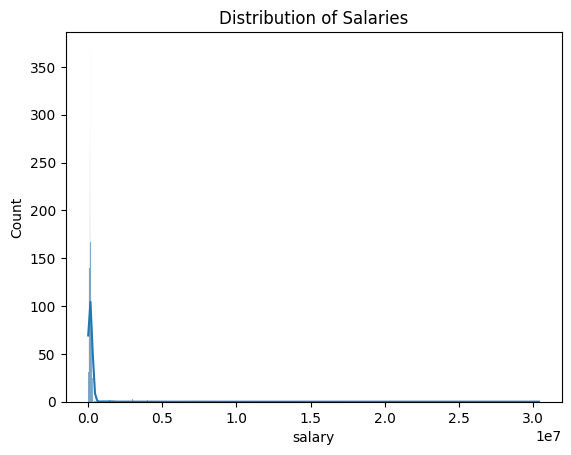

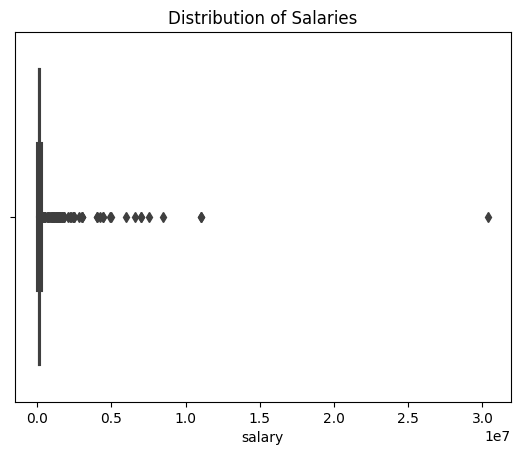

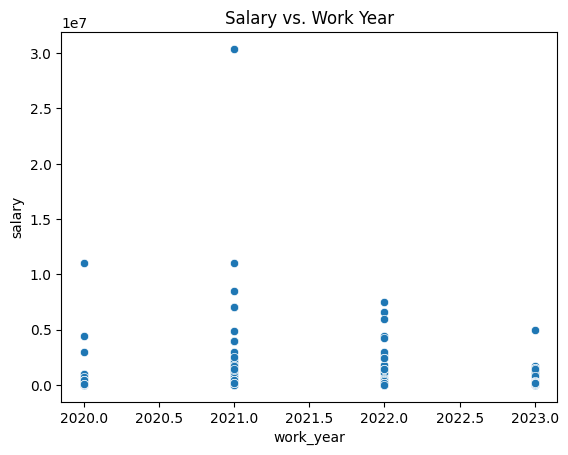

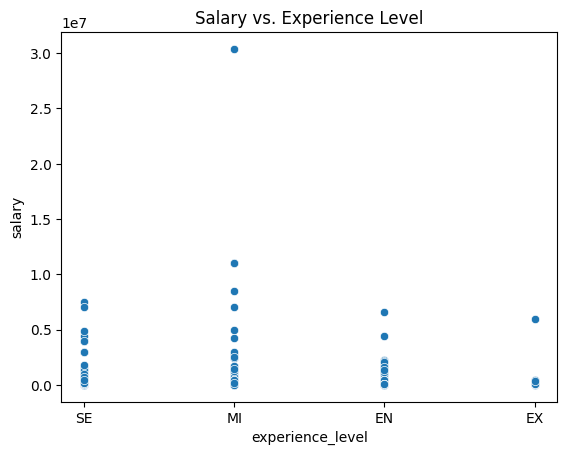

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ds_salaries.csv')

# Plot a histogram of the salary distribution
sns.histplot(data=df, x='salary', kde=True)
plt.title('Distribution of Salaries')
plt.show()

# Plot a box plot of the salary distribution
sns.boxplot(data=df, x='salary')
plt.title('Distribution of Salaries')
plt.show()

# Plot a scatter plot of the salary versus work_year
sns.scatterplot(data=df, x='work_year', y='salary')
plt.title('Salary vs. Work Year')
plt.show()

# Plot a scatter plot of the salary versus experience_level
sns.scatterplot(data=df, x='experience_level', y='salary')
plt.title('Salary vs. Experience Level')
plt.show()


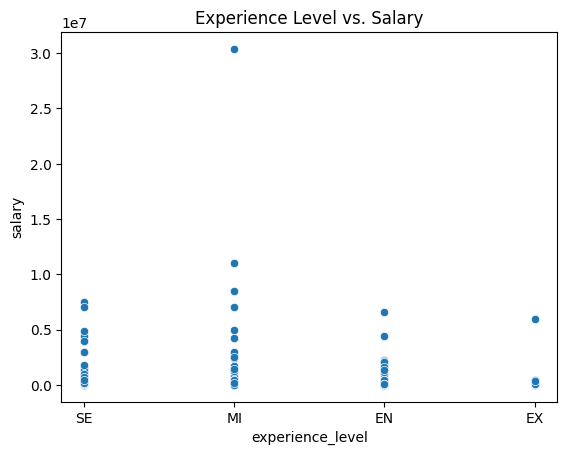

In [ ]:
sns.scatterplot(data=df, x='experience_level', y='salary')
plt.title('Experience Level vs. Salary')
plt.show()


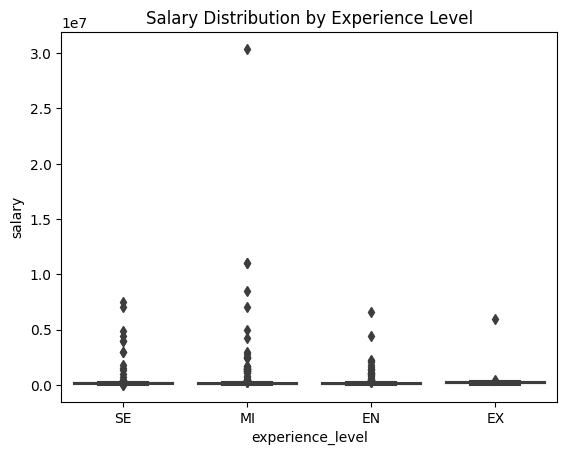

In [ ]:
sns.boxplot(data=df, x='experience_level', y='salary')
plt.title('Salary Distribution by Experience Level')
plt.show()

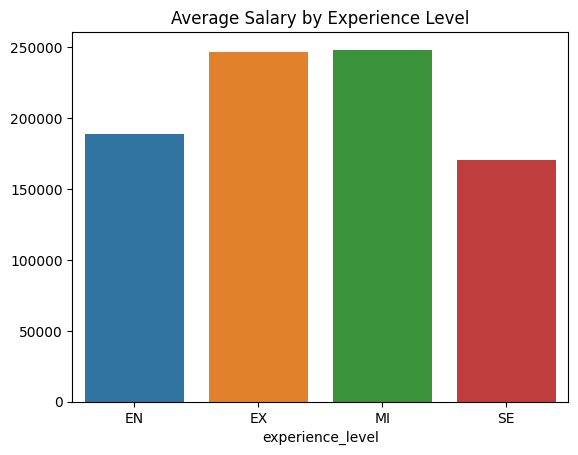

In [ ]:
avg_salary = df.groupby('experience_level')['salary'].mean()
sns.barplot(x=avg_salary.index, y=avg_salary.values)
plt.title('Average Salary by Experience Level')
plt.show()


<ipython-input-37-7ac8aa6aeacc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


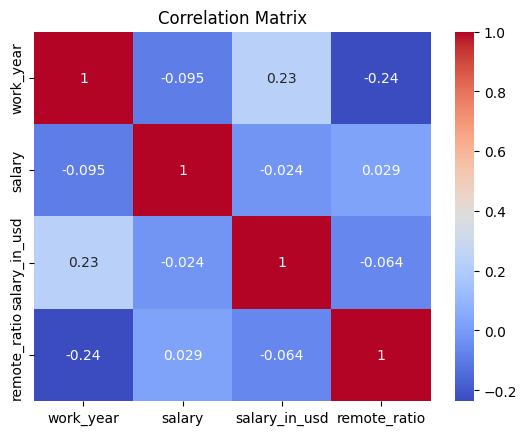

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Find the highest and lowest salaries
highest_salary = df['salary'].max()
lowest_salary = df['salary'].min()

print("The highest salary is: ${:,.2f}".format(highest_salary))
print("The lowest salary is: ${:,.2f}".format(lowest_salary))


The highest salary is: $30,400,000.00
The lowest salary is: $6,000.00


In [ ]:
# Find the median salary
median_salary = df['salary'].median()

print("The median salary is: ${:,.2f}".format(median_salary))


The median salary is: $138,000.00


In [ ]:
# Find the mean salary
mean_salary = df['salary'].mean()

print("The mean salary is: ${:,.2f}".format(mean_salary))


The mean salary is: $190,695.57


In [ ]:
# Find the unique values of the experience_level column
experience_levels = df['experience_level'].unique()

print("Experience Levels:", experience_levels)


Experience Levels: ['SE' 'MI' 'EN' 'EX']


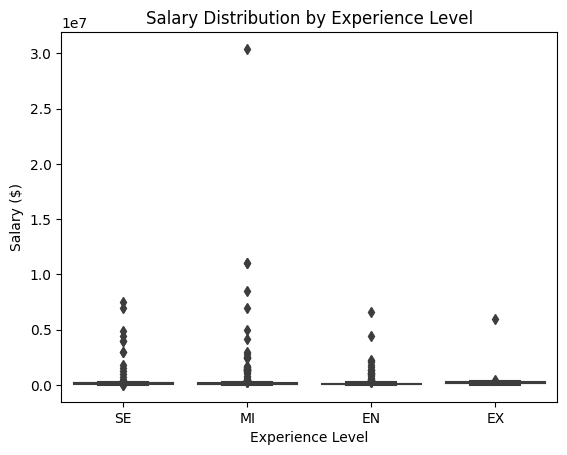

In [ ]:
# Create a boxplot of salary distribution by experience level
sns.boxplot(data=df, x='experience_level', y='salary')
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary ($)')
plt.show()


### **Step 2.The Apriori algorithm implementation**

In [ ]:
from collections import defaultdict
from itertools import combinations

class Arules:
    def __init__(self):
        self.freq_itemsets = defaultdict(int)
        self.transactions = []
        
    def get_frequent_itemsets(self, transactions, min_support):
        self.transactions = transactions
        items = defaultdict(int)
        for transaction in self.transactions:
            for item in transaction:
                items[item] += 1
        
        self.freq_itemsets = {frozenset([item]): support for item, support in items.items() if support / len(transactions) >= min_support}
        
        k = 1
        while True:
            k += 1
            new_candidates = set([x.union(y) for x in self.freq_itemsets.keys() for y in self.freq_itemsets.keys() if len(x.union(y)) == k])
            if not new_candidates:
                break
            
            freq_itemsets = defaultdict(int)
            for transaction in transactions:
                for candidate in new_candidates:
                    if candidate.issubset(transaction):
                        freq_itemsets[candidate] += 1
            
            self.freq_itemsets.update({itemset: support for itemset, support in freq_itemsets.items() if support / len(transactions) >= min_support})
            
            if k == 3:
                break
    
    def get_rules(self, min_support=None, min_confidence=None, min_lift=None, sort_by='lift'):
        # Get frequent itemsets using Apriori algorithm
        if not self.freq_itemsets:
            self.get_frequent_itemsets(self.transactions, min_support)

        # Convert frequent itemsets to rules
        rules = []
        for itemset, support in self.freq_itemsets.items():
            for i in range(1, len(itemset)):
                for antecedent in combinations(itemset, i):
                    antecedent = frozenset(antecedent)
                    consequent = itemset - antecedent
                    confidence = support / self.freq_itemsets[antecedent]
                    lift = confidence / (self.freq_itemsets[consequent] / len(self.transactions))
                    if min_confidence is None or confidence >= min_confidence:
                        if min_lift is None or lift >= min_lift:
                            rules.append((antecedent, consequent, support, confidence, lift))

        # Sort rules by support, confidence or lift
        sort_key = {'support': 2, 'confidence': 3, 'lift': 4}[sort_by]
        rules.sort(key=lambda x: x[sort_key], reverse=True)

        return rules


### **Step 3. The 10 most frequent itemsets by running the Apriori algorithm implemented on the dataset, with min_support = 0.005.**

In [ ]:
import csv

transactions = []
with open('/content/drive/MyDrive/ds_salaries.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        transactions.append(row)

arules = Arules()
arules.get_frequent_itemsets(transactions, min_support=0.005)
frequent_itemsets = sorted(arules.freq_itemsets.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 frequent itemsets:")
for itemset, support in frequent_itemsets:
    print("{}, Support: {:.2f}%".format(list(itemset), support * 100))

Top 10 frequent itemsets:
['US'], Support: 604400.00%
['FT'], Support: 371800.00%
['USD'], Support: 322400.00%
['USD', 'FT'], Support: 319900.00%
['M'], Support: 315300.00%
['M', 'FT'], Support: 313900.00%
['USD', 'US'], Support: 303700.00%
['US', 'FT'], Support: 302700.00%
['USD', 'FT', 'US'], Support: 302000.00%
['USD', 'M'], Support: 284700.00%


### **Step 4. Generating the required rules with min_confidence=0.2 and calculating the lift criterion for them and sort them in descending order**

In [ ]:
rules = arules.get_rules(min_support=0.005, min_confidence=0.2, min_lift=1)
rules = sorted(rules, key=lambda x: x[4], reverse=True)

print("\nRules:")
for antecedent, consequent, support, confidence, lift in rules:
    print("{0} => {1}, Support: {2:.2f}%, Confidence: {3:.2f}%, Lift: {4:.2f}".format(list(antecedent), list(consequent), support * 100, confidence * 100, lift))


Rules:
['2021', 'IN'] => ['INR'], Support: 2300.00%, Confidence: 92.00%, Lift: 57.59
['INR'] => ['2021', 'IN'], Support: 2300.00%, Confidence: 38.33%, Lift: 57.59
['50', 'IN'] => ['INR'], Support: 2000.00%, Confidence: 90.91%, Lift: 56.91
['INR'] => ['50', 'IN'], Support: 2000.00%, Confidence: 33.33%, Lift: 56.91
['MI', 'IN'] => ['INR'], Support: 2800.00%, Confidence: 87.50%, Lift: 54.78
['INR'] => ['MI', 'IN'], Support: 2800.00%, Confidence: 46.67%, Lift: 54.77
['INR'] => ['FT', 'IN'], Support: 5800.00%, Confidence: 96.67%, Lift: 52.62
['FT', 'IN'] => ['INR'], Support: 5800.00%, Confidence: 84.06%, Lift: 52.62
['L', 'IN'] => ['INR'], Support: 3800.00%, Confidence: 82.61%, Lift: 51.71
['INR'] => ['L', 'IN'], Support: 3800.00%, Confidence: 63.33%, Lift: 51.71
['2022', 'IN'] => ['INR'], Support: 2000.00%, Confidence: 76.92%, Lift: 48.15
['INR'] => ['2022', 'IN'], Support: 2000.00%, Confidence: 33.33%, Lift: 48.15
['INR'] => ['100', 'IN'], Support: 3100.00%, Confidence: 51.67%, Lift: 47.

### **Step 5. Changing min_support and min_confidence and analysis the result**

**Analysis the effect of changing the minimum support threshold on the number of rules**

In [ ]:
ar = Arules()

ar.get_frequent_itemsets(transactions, min_support=0.002)
rules1 = ar.get_rules(min_support=0.002, min_confidence=0.2)

ar.get_frequent_itemsets(transactions, min_support=0.004)
rules2 = ar.get_rules(min_support=0.004, min_confidence=0.2)

ar.get_frequent_itemsets(transactions, min_support=0.007)
rules3 = ar.get_rules(min_support=0.007, min_confidence=0.2)


print(f"Minimum support: 0.002, Number of rules: {len(rules1)}")
print(f"Minimum support: 0.004, Number of rules: {len(rules2)}")
print(f"Minimum support: 0.007, Number of rules: {len(rules3)}")

Minimum support: 0.002, Number of rules: 12540
Minimum support: 0.004, Number of rules: 6593
Minimum support: 0.007, Number of rules: 4072


**Analysis the effect of changing the minimum confidence threshold on the number of rules discovered**

In [ ]:
arules.get_frequent_itemsets(transactions, min_support=0.005)
for min_conf in [0.1, 0.2, 0.3, 0.4, 0.5]:
    rules = arules.get_rules(min_support=0.005, min_confidence=min_conf)
    print(f"Minimum confidence: {min_conf}, Number of rules: {len(rules)}")
    if len(rules) > 0:
        print("Top 5 rules by lift:")
        for rule in rules[:5]:
            print(f"  {rule}")

Minimum confidence: 0.1, Number of rules: 6586
Top 5 rules by lift:
  (frozenset({'2021', 'IN'}), frozenset({'INR'}), 23, 0.92, 57.592000000000006)
  (frozenset({'INR'}), frozenset({'2021', 'IN'}), 23, 0.38333333333333336, 57.592)
  (frozenset({'50', 'IN'}), frozenset({'INR'}), 20, 0.9090909090909091, 56.90909090909091)
  (frozenset({'INR'}), frozenset({'50', 'IN'}), 20, 0.3333333333333333, 56.9090909090909)
  (frozenset({'MI', 'IN'}), frozenset({'INR'}), 28, 0.875, 54.775000000000006)
Minimum confidence: 0.2, Number of rules: 5704
Top 5 rules by lift:
  (frozenset({'2021', 'IN'}), frozenset({'INR'}), 23, 0.92, 57.592000000000006)
  (frozenset({'INR'}), frozenset({'2021', 'IN'}), 23, 0.38333333333333336, 57.592)
  (frozenset({'50', 'IN'}), frozenset({'INR'}), 20, 0.9090909090909091, 56.90909090909091)
  (frozenset({'INR'}), frozenset({'50', 'IN'}), 20, 0.3333333333333333, 56.9090909090909)
  (frozenset({'MI', 'IN'}), frozenset({'INR'}), 28, 0.875, 54.775000000000006)
Minimum confidence

**Analysis the effect of changing the minimum confidence threshold on lift values**

In [ ]:
# Run Apriori algorithm with min confidence = 0.2 and min support = 0.005
rules1 = arules.get_rules(min_support=0.005, min_confidence=0.2, sort_by='lift')

# Run Apriori algorithm with min confidence = 0.5 and min support = 0.005
rules2 = arules.get_rules(min_support=0.005, min_confidence=0.5, sort_by='lift')

# Run Apriori algorithm with min confidence = 0.8 and min support = 0.005
rules3 = arules.get_rules(min_support=0.005, min_confidence=0.8, sort_by='lift')

# Print the lift values of the top 10 rules for each set of rules
print("Rules with min confidence = 0.2 and min support = 0.005:")
for r in rules1[:10]:
    print(f"{r[0]} => {r[1]} (lift = {r[2]:.2f})")

print("\nRules with min confidence = 0.5 and min support = 0.005:")
for r in rules2[:10]:
    print(f"{r[0]} => {r[1]} (lift = {r[2]:.2f})")

print("\nRules with min confidence = 0.8 and min support = 0.005:")
for r in rules3[:10]:
    print(f"{r[0]} => {r[1]} (lift = {r[2]:.2f})")



Rules with min confidence = 0.2 and min support = 0.005:
frozenset({'2021', 'IN'}) => frozenset({'INR'}) (lift = 23.00)
frozenset({'INR'}) => frozenset({'2021', 'IN'}) (lift = 23.00)
frozenset({'50', 'IN'}) => frozenset({'INR'}) (lift = 20.00)
frozenset({'INR'}) => frozenset({'50', 'IN'}) (lift = 20.00)
frozenset({'MI', 'IN'}) => frozenset({'INR'}) (lift = 28.00)
frozenset({'INR'}) => frozenset({'MI', 'IN'}) (lift = 28.00)
frozenset({'INR'}) => frozenset({'FT', 'IN'}) (lift = 58.00)
frozenset({'FT', 'IN'}) => frozenset({'INR'}) (lift = 58.00)
frozenset({'L', 'IN'}) => frozenset({'INR'}) (lift = 38.00)
frozenset({'INR'}) => frozenset({'L', 'IN'}) (lift = 38.00)

Rules with min confidence = 0.5 and min support = 0.005:
frozenset({'2021', 'IN'}) => frozenset({'INR'}) (lift = 23.00)
frozenset({'50', 'IN'}) => frozenset({'INR'}) (lift = 20.00)
frozenset({'MI', 'IN'}) => frozenset({'INR'}) (lift = 28.00)
frozenset({'INR'}) => frozenset({'FT', 'IN'}) (lift = 58.00)
frozenset({'FT', 'IN'}) => 

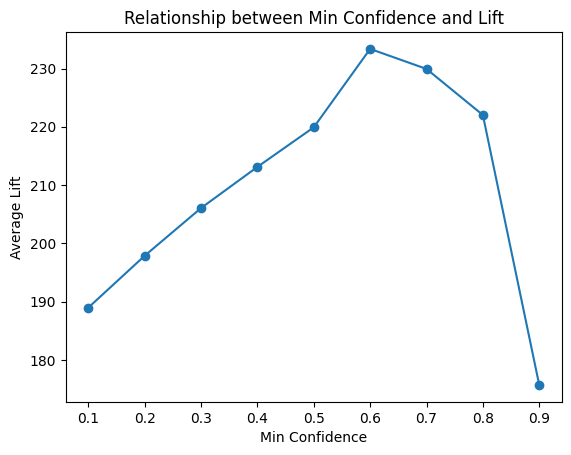

In [ ]:
import matplotlib.pyplot as plt

# define the range of min_confidence values to test
min_confidence_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# create an empty list to store the lift values for each min_confidence
lift_values = []

# iterate through the range of min_confidence values and calculate lift for each
for min_confidence in min_confidence_range:
    rules = arules.get_rules(min_support=0.005, min_confidence=min_confidence)
    lift_values.append(sum(rule[2] for rule in rules) / len(rules))

# create a line plot to show the relationship between min_confidence and lift
plt.plot(min_confidence_range, lift_values, marker='o')
plt.xlabel('Min Confidence')
plt.ylabel('Average Lift')
plt.title('Relationship between Min Confidence and Lift')
plt.show()